Урок 5. Рекуррентные нейронные сети

Рекуррентная нейроная сеть обученная складывать числа.

In [ ]:
import copy, numpy as np
np.random.seed(5)

# Сигмоида
def sigmoid(x):
	output = 1/(1 + np.exp(-x))
	return output
# Конвертируем значение функции сигмоиды в ее производную
def sigmoid_to_derivative(output):
	return output*(1 - output)

In [ ]:
int2binary = {}
binary_dim = 8

# Генерация тренировочного датасета
largest_number = pow(2, binary_dim)
binary = np.unpackbits(np.array([list(range(largest_number))], dtype=np.uint8).T, axis=1)

print(binary.shape)
print(binary[255])
largest_number

(256, 8)
[1 1 1 1 1 1 1 1]


256

In [ ]:
# входные переменные
alpha = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1

In [ ]:
# инициализация весов нейронной сети
synapse_0 = 2*np.random.random((input_dim,hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim,output_dim)) - 1
synapse_h = 2*np.random.random((hidden_dim,hidden_dim)) - 1
synapse_0_update = np.zeros_like(synapse_0)
synapse_1_update = np.zeros_like(synapse_1)
synapse_h_update = np.zeros_like(synapse_h)

In [ ]:
a[1], b[2]

NameError: name 'a' is not defined

In [ ]:
print('synapse_0', synapse_0.shape)
print('synapse_1', synapse_1.shape)
print('synapse_h', synapse_h.shape)

print(synapse_0_update.shape)
print(synapse_1_update.shape)
print(synapse_h_update.shape)
binary_dim

synapse_0 (2, 16)
synapse_1 (16, 1)
synapse_h (16, 16)
(2, 16)
(16, 1)
(16, 16)


8

In [ ]:
binary_dim = 8
#int2binary = np.array([])

# Генерация тренировочного датасета
largest_number = pow(2, binary_dim)
binary = np.unpackbits(np.array([list(range(largest_number))], dtype=np.uint8).T, axis=1)
print(type(binary))
#for i in range(largest_number):
#	int2binary[i] = binary[i]

int2binary = binary
print(binary)
# Входные переменные
alpha = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1

# Инициализация весов нейронной сети
synapse_0 = 2*np.random.random((input_dim, hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim, output_dim)) - 1
synapse_h = 2*np.random.random((hidden_dim, hidden_dim)) - 1

synapse_0_update = np.zeros_like(synapse_0)
synapse_1_update = np.zeros_like(synapse_1)
synapse_h_update = np.zeros_like(synapse_h)

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]


In [ ]:
# Генерация тренировочного датасета
largest_number = pow(2, binary_dim)
binary = np.unpackbits(np.array([list(range(largest_number))], dtype=np.uint8).T, axis=1)
for i in range(largest_number):
	int2binary[i] = binary[i]

# Входные переменные
alpha = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1

# Инициализация весов нейронной сети
synapse_0 = 2*np.random.random((input_dim, hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim, output_dim)) - 1
synapse_h = 2*np.random.random((hidden_dim, hidden_dim)) - 1

synapse_0_update = np.zeros_like(synapse_0)
synapse_1_update = np.zeros_like(synapse_1)
synapse_h_update = np.zeros_like(synapse_h)

In [ ]:
# Тренировочная логика
for j in range(10000):
	# Генерация простой проблемы сложения (a + b = c)
  a_int = np.random.randint(largest_number / 2) # int version
  a = int2binary[a_int] # Бинарное кодирование

  b_int = np.random.randint(largest_number/2) # int version
  b = int2binary[b_int] # Бинарное кодирование

  # Правильный ответ
  c_int = a_int + b_int
  c = int2binary[c_int]

  # Место где мы располагаем наши лучшие результаты (бинарно закодированные)
  d = np.zeros_like(c)
  overallError = 0
  layer_2_deltas = list()
  layer_1_values = list()
  layer_1_values.append(np.zeros(hidden_dim))

  # Движение вдоль позиции бинарной кодировки (идем вдоль последовательности)
  for position in range(binary_dim):
    # input and output generation
    X = np.array([[a[binary_dim - position - 1], b[binary_dim - position - 1]]])
    y = np.array([[c[binary_dim - position -1]]]).T

    # Внутренний слой (input + предыдущий внутренний)
    layer_1 = sigmoid(np.dot(X, synapse_0) + np.dot(layer_1_values[-1], synapse_h))

    # Output layer (новое бинарное представление)
    layer_2 = sigmoid(np.dot(layer_1, synapse_1))

    # Проверка упустили ли мы что-то и если, да то как много
    layer_2_error = y - layer_2
    layer_2_deltas.append((layer_2_error) * sigmoid_to_derivative(layer_2))
    overallError += np.abs(layer_2_error[0])

    # Декодируем оценку чтобы мы могли ее вывести на экран
    d[binary_dim - position - 1] = np.round(layer_2[0][0])

    # Сохраняем внутренний слой, чтобы мы могли его использовать в след. timestep
    layer_1_values.append(copy.deepcopy(layer_1))

  future_layer_1_delta = np.zeros(hidden_dim)

  for position in range(binary_dim):
	  X = np.array([[a[position], b[position]]])
	  layer_1 = layer_1_values[-position - 1]
	  prev_layer_1 = layer_1_values[-position - 2]

	  # Величина ошибки в output layer
	  layer_2_delta = layer_2_deltas[-position - 1]
	  # Величина ошибки в hidden layer
	  layer_1_delta = (future_layer_1_delta.dot(synapse_h.T) + layer_2_delta.dot(synapse_1.T)) * sigmoid_to_derivative(layer_1)
	  # Обновление всех весов и пробуем заново
	  synapse_1_update += np.atleast_2d(layer_1).T.dot(layer_2_delta)
	  synapse_h_update += np.atleast_2d(prev_layer_1).T.dot(layer_1_delta)
	  synapse_0_update += X.T.dot(layer_1_delta)

	  future_layer_1_delta = layer_1_delta

  synapse_0 += synapse_0_update * alpha
  synapse_1 += synapse_1_update * alpha
  synapse_h += synapse_h_update * alpha

  synapse_0_update *= 0
  synapse_1_update *= 0
  synapse_h_update *= 0

  # Вывод на экран процесса обучения
  if (j % 500 == 0):
    print('Error:' + str(overallError) + ' step number - ' + str(j))
    print('Pred:' + str(d))
    print('True:' + str(c))
    out = 0
    for index, x in enumerate(reversed(d)):
      out += x * pow(2, index)
    print(str(a_int) + ' + ' + str(b_int) + ' = ' + str(out) + ' (' + str(c_int) + ')')
    print('------------------')

Error:[4.13657696] step number - 0
Pred:[1 1 1 1 1 1 1 0]
True:[1 0 0 0 0 1 1 1]
16 + 119 = 254 (135)
------------------
Error:[4.01253469] step number - 500
Pred:[1 0 1 0 0 0 1 0]
True:[0 1 0 1 0 1 1 0]
1 + 85 = 162 (86)
------------------
Error:[3.92709191] step number - 1000
Pred:[0 1 1 0 1 0 0 1]
True:[0 1 1 1 0 1 0 1]
84 + 33 = 105 (117)
------------------
Error:[3.99377356] step number - 1500
Pred:[0 0 1 1 1 1 1 1]
True:[0 0 1 0 0 0 1 0]
19 + 15 = 63 (34)
------------------
Error:[3.56358919] step number - 2000
Pred:[1 0 0 1 1 1 0 1]
True:[1 0 0 1 0 1 1 1]
73 + 78 = 157 (151)
------------------
Error:[3.53543702] step number - 2500
Pred:[1 1 0 1 1 1 0 0]
True:[1 1 0 1 1 0 0 0]
114 + 102 = 220 (216)
------------------
Error:[3.85826392] step number - 3000
Pred:[0 1 1 0 1 1 1 0]
True:[0 1 0 1 0 0 0 0]
55 + 25 = 110 (80)
------------------
Error:[2.80869365] step number - 3500
Pred:[1 1 0 0 1 0 1 1]
True:[1 0 0 0 1 0 1 1]
87 + 52 = 203 (139)
------------------
Error:[1.35924372] ste

In [ ]:
a_int = int(input('Первое число ?'))
a = int2binary[a_int] # Бинарное кодирование
b_int = int(input('Второе число ?'))
b = int2binary[b_int] # Бинарное кодирование
# c_int = a_int + b_int
# c = int2binary[c_int]
d = np.zeros_like(a)
layer_2_deltas = list()
layer_1_values = list()
layer_1_values.append(np.zeros(hidden_dim))

for position in range(binary_dim):
	# input and output generation
	X = np.array([[a[binary_dim - position - 1], b[binary_dim - position - 1]]])

	# Внутренний слой (input + предыдущий внутренний)
	layer_1 = sigmoid(np.dot(X, synapse_0) + np.dot(layer_1_values[-1], synapse_h))

	# Output layer (новое бинарное представление)
	layer_2 = sigmoid(np.dot(layer_1, synapse_1))

	# Декодируем оценку чтобы мы могли ее вывести на экран
	d[binary_dim - position - 1] = np.round(layer_2[0][0])
	layer_1_values.append(copy.deepcopy(layer_1))

out = 0
for index, x in enumerate(reversed(d)):
	out += x * pow(2, index)
print(f'Ответ - {out}')

Первое число ?1
Второе число ?2
Ответ - 3


Второй учебный пример реализации LSTM

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, GRU, SimpleRNN, LSTM, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import tensorflow as tf

In [ ]:
xLen = 10 # длина истории
n=5 # длина вектора данных

x = Input(shape = (xLen, n,))
y = LSTM(32, return_sequences = True)(x)
y1 = LSTM(32, return_sequences = False)(y)

In [ ]:
y

<KerasTensor: shape=(None, 10, 32) dtype=float32 (created by layer 'lstm')>

In [ ]:
y1

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'lstm_1')>

In [ ]:
model = Model(x, y1)
model.compile(loss = 'mse', optimizer = 'Adam', metrics = ['mse'])

In [ ]:
xx = np.random.randn(1, xLen, n)
y.shape, xx.shape
yy = model.predict(xx)

1/1 [==============================] - 1s 982ms/step


In [ ]:
yy.shape

(1, 32)

In [ ]:
xx.shape

(1, 10, 5)

более прагматичный вариант

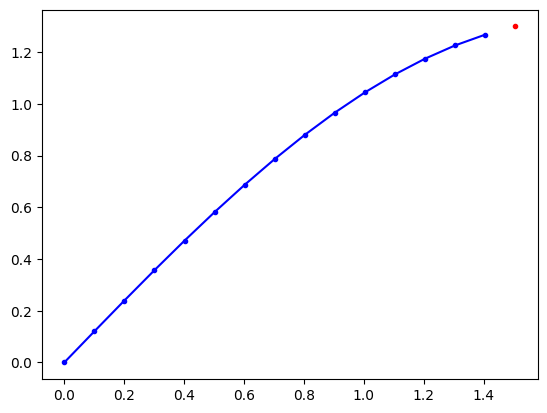

((284, 1), (284, 15, 2))

In [ ]:
N = 300
t = np.linspace(0, 30, N).reshape((N, 1))
x = np.sin(t) + t*0.2
n = 2
xLen = 15

plt.plot(t[0:xLen], x[0:xLen], '.-b')

h = 1 #горизонт прогноза
xx = []
y = []
for i in range(N-xLen - h):
	xx.append(np.concatenate((t[i:xLen + i], x[i:xLen + i])).reshape((xLen, 2)))
	y.append(x[i + h + xLen - 1])
xx = np.array(xx)
y = np.array(y)

plt.plot(t[xLen + h -1], y[0], '.r')
plt.show()
y.shape, xx.shape

In [ ]:
x_in = Input(shape = (xLen, n, ))
y_out = LSTM(164, return_sequences = False)(x_in)
y_out = Dense(1, activation = 'linear')(y_out)

model = Model(x_in, y_out)
model.compile(loss = 'mse', optimizer = 'Adam', metrics = ['mse'])

In [ ]:
x_in

<KerasTensor: shape=(None, 15, 2) dtype=float32 (created by layer 'input_2')>

In [ ]:
xx.shape

(284, 15, 2)

In [ ]:
test_n = 200
model.fit(xx[:test_n, :, :], y[:test_n], epochs = 20)

Epoch 1/20
7/7 [==============================] - 3s 6ms/step - loss: 2.6483 - mse: 2.6483
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.7967 - mse: 0.7967
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.5378 - mse: 0.5378
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 0.3503 - mse: 0.3503
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 0.2369 - mse: 0.2369
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 0.2192 - mse: 0.2192
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1760 - mse: 0.1760
Epoch 8/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1614 - mse: 0.1614
Epoch 9/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1531 - mse: 0.1531
Epoch 10/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1358 - mse: 0.1358
Epoch 11/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1352 - mse: 0.13

In [ ]:
ypred = model.predict(xx[test_n:, :, :])

3/3 [==============================] - 0s 6ms/step


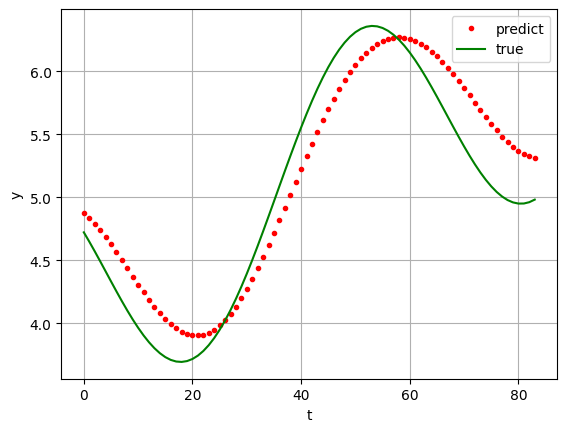

In [ ]:
plt.plot(ypred, '.r', label = 'predict')
plt.plot(y[test_n:], 'g', label = 'true')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

более прикладное - генерация текста

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


Разбор текста токенизация

In [ ]:

!wget https://gbcdn.mrgcdn.ru/uploads/asset/3196055/attachment/e4a02940fc8d378330731ae4f7eb7dd4.txt -O alice.txt

--2024-03-18 13:57:19--  https://gbcdn.mrgcdn.ru/uploads/asset/3196055/attachment/e4a02940fc8d378330731ae4f7eb7dd4.txt
Resolving gbcdn.mrgcdn.ru (gbcdn.mrgcdn.ru)... 5.181.61.0
Connecting to gbcdn.mrgcdn.ru (gbcdn.mrgcdn.ru)|5.181.61.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169855 (166K) [text/plain]
Saving to: ‘alice.txt’

alice.txt           100%[===================>] 165.87K   610KB/s    in 0.3s    

2024-03-18 13:57:21 (610 KB/s) - ‘alice.txt’ saved [169855/169855]



In [ ]:
tokenizer = Tokenizer(num_words=10000)
data = open('alice.txt').read()
corpus = data[711:].lower().split('\n')

In [ ]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i + 1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words)


In [ ]:
token_list

[3382, 4, 364, 1299, 3383, 4, 276, 38, 493, 619]

In [ ]:
tokenizer.index_word[12]

'alice'

In [ ]:
tokenizer.word_index['love']

1054

In [ ]:
input_sequences[5:15,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  12,  13],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  12,  13, 275],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  12,  13, 275,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         12,  13, 275,   4, 116],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,
         13, 275,   4, 116,  29],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  13,
        275,   4, 116,  29, 550],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  13, 275,
          4, 116,  29, 550,   6],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  13, 275,   4,
        116,  29, 550,   6, 405],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12,  13, 275,   4, 116,
         29, 550,   6, 405,  59],
       [  0,   0,   0,   0,   0,   0,

In [ ]:
label.shape

(28138, 3384)

In [ ]:
# label.shape
total_words

3384

In [ ]:
callback = EarlyStopping(monitor = 'val_accuracy', patience = 15)

In [ ]:

model = Sequential()
model.add(Embedding(total_words, 256, input_length = max_sequence_len-1)) # вложение тренируемое для перехода от слова к его векторному коды
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 256) координат - он плотный

model.add(Bidirectional(LSTM(50, return_sequences = True)))

model.add(LSTM(128))
# model.add(Dropout(0.2))
model.add(Dense(total_words/2, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(total_words, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 256)           866304    
                                                                 
 bidirectional (Bidirection  (None, 17, 100)           122800    
 al)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1692)              218268    
                                                                 
 dense_2 (Dense)             (None, 3384)              5729112   
                                                                 
Total params: 7053732 (26.91 MB)
Trainable params: 7053732 (26.91 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
history = model.fit(predictors, label, epochs = 5, validation_split=0.2, callbacks=[callback], verbose=1)

Epoch 1/5
704/704 [==============================] - 21s 21ms/step - loss: 6.2752 - accuracy: 0.0544 - val_loss: 7.0118 - val_accuracy: 0.0354
Epoch 2/5
704/704 [==============================] - 8s 12ms/step - loss: 5.8375 - accuracy: 0.0607 - val_loss: 7.4817 - val_accuracy: 0.0768
Epoch 3/5
704/704 [==============================] - 7s 11ms/step - loss: 5.6071 - accuracy: 0.0766 - val_loss: 7.5706 - val_accuracy: 0.0485
Epoch 4/5
704/704 [==============================] - 8s 11ms/step - loss: 5.4096 - accuracy: 0.0913 - val_loss: 7.6954 - val_accuracy: 0.0792
Epoch 5/5
704/704 [==============================] - 8s 11ms/step - loss: 5.2332 - accuracy: 0.1052 - val_loss: 7.8611 - val_accuracy: 0.0849


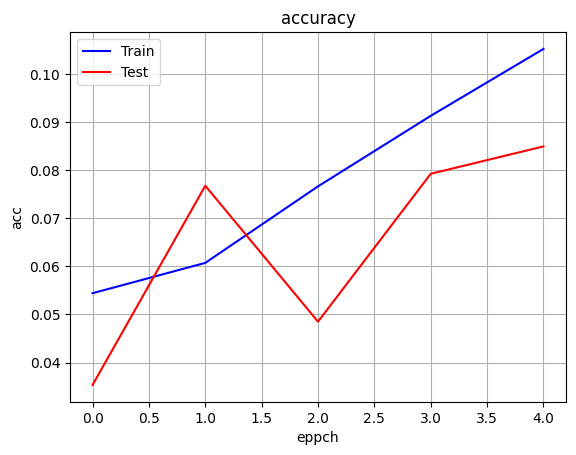

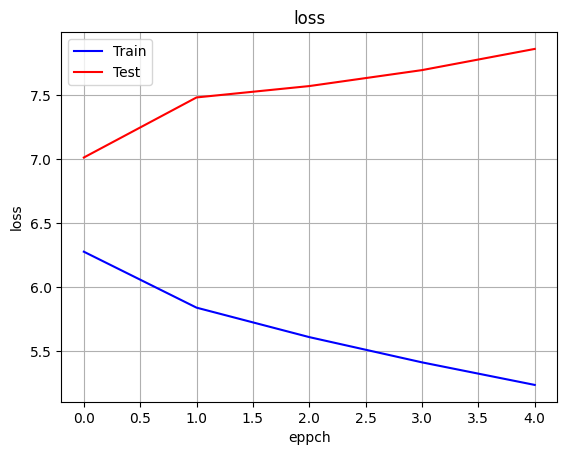

In [ ]:
acc = history.history['accuracy']
acc_v = history.history['val_accuracy']
loss = history.history['loss']
loss_v = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Train')
plt.plot(epochs, acc_v, 'r', label = 'Test')
plt.legend()
plt.title('accuracy')
plt.xlabel('eppch')
plt.ylabel('acc')
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'b', label = 'Train')
plt.plot(epochs, loss_v, 'r', label = 'Test')
plt.title('loss')
plt.xlabel('eppch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

Строим тест генератора


In [ ]:
# Начальная строка
seed_text = 'He set down every evil thought he had and renounced it'
next_words = 10
# строим последовательность и новое предсказание
for _ in range(next_words):
	# Текущая последовательность (токенизация и дополнение)
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	print(token_list)
	token_list = pad_sequences([token_list], maxlen = max_sequence_len -1, padding = 'pre')
	# Делаем предсказание (сразу как индекс класса - у нас 1 из 3384....)
	predicted = model.predict(token_list, verbose=0)
	predict_ = np.argmax(predicted)
	output_word = ''
	print(predict_)
	# Добавим новое слово в последовательность
	for word, index in tokenizer.word_index.items():
		if index == predict_:
			output_word = word
			break
	seed_text += ' ' + output_word
	print(seed_text)

[36, 206, 37, 347, 62, 36, 22, 3, 8]
13
He set down every evil thought he had and renounced it was
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13]
1
He set down every evil thought he had and renounced it was the
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1]
32
He set down every evil thought he had and renounced it was the little
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1, 32]
32
He set down every evil thought he had and renounced it was the little little
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1, 32, 32]
32
He set down every evil thought he had and renounced it was the little little little
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1, 32, 32, 32]
32
He set down every evil thought he had and renounced it was the little little little little
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1, 32, 32, 32, 32]
32
He set down every evil thought he had and renounced it was the little little little little little
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1, 32, 32, 32, 32, 32]
32
He set down every evil thought he

In [ ]:
y_p = model.predict(token_list)

1/1 [==============================] - 0s 26ms/step


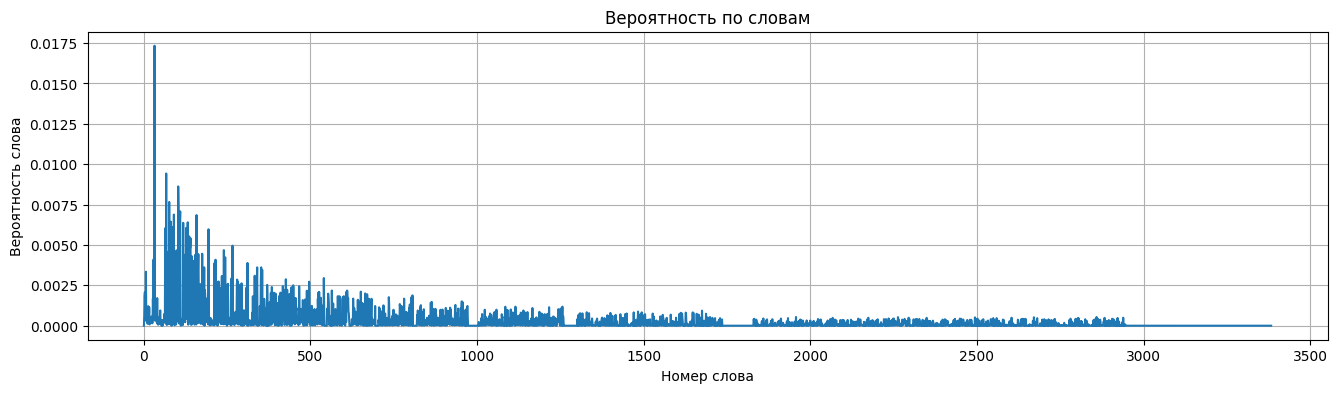

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(y_p[0,:])
plt.xlabel('Номер слова')
plt.ylabel('Вероятность слова')
plt.title('Вероятность по словам')
plt.grid('on')
plt.show()

## Временные ряды

In [ ]:
!pip install tensorflow

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM
from google.colab import files
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
import os
import datetime

In [ ]:
!wget https://gbcdn.mrgcdn.ru/uploads/asset/3196056/attachment/49718b914b30dae0983f1be37c32ec9d.csv -O airplane.csv
# data = open('airplane.csv').r

--2024-03-18 14:02:41--  https://gbcdn.mrgcdn.ru/uploads/asset/3196056/attachment/49718b914b30dae0983f1be37c32ec9d.csv
Resolving gbcdn.mrgcdn.ru (gbcdn.mrgcdn.ru)... 5.181.61.0
Connecting to gbcdn.mrgcdn.ru (gbcdn.mrgcdn.ru)|5.181.61.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2037 (2.0K) [text/csv]
Saving to: ‘airplane.csv’

airplane.csv        100%[===================>]   1.99K  --.-KB/s    in 0s      

2024-03-18 14:02:41 (1.22 GB/s) - ‘airplane.csv’ saved [2037/2037]



In [ ]:
data = pd.read_csv('airplane.csv')
data.index = data.Month
data.drop(['Month'], axis=1, inplace=True)
data.head(7)

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148


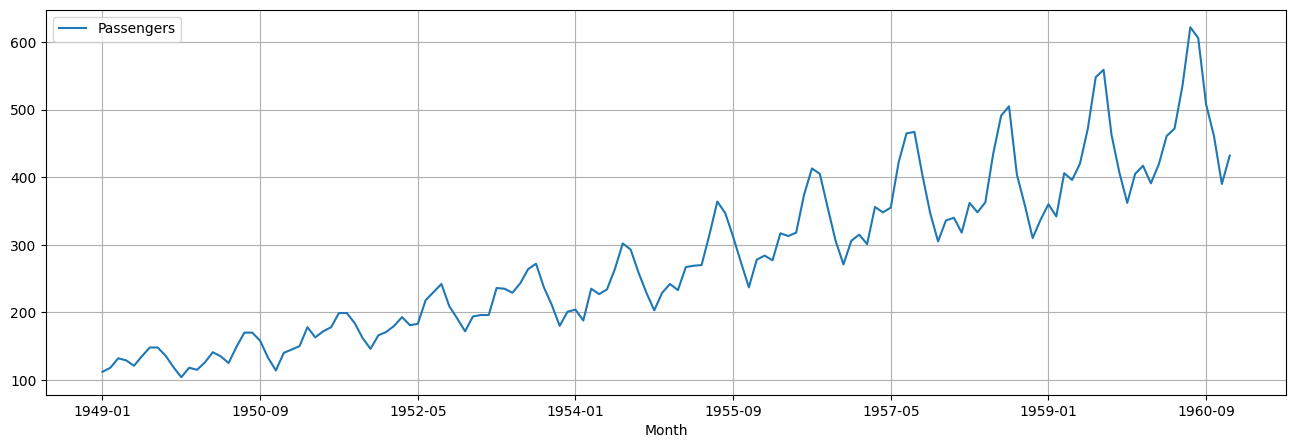

In [ ]:
data.plot(figsize = (16, 5))
plt.grid('On')

In [ ]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
# Добавим дату как признаки как месяц года /12  и год - 1949
data['month'] = pd.to_datetime(data.index).month / 12
data['year'] = (pd.to_datetime(data.index).year - 1949) / 11
data.head()

,Passengers,month,year
Month,,,
1949-01,112,0.083333,0.0
1949-02,118,0.166667,0.0
1949-03,132,0.250000,0.0
1949-04,129,0.333333,0.0
1949-05,121,0.416667,0.0


In [ ]:
# Делаем нормализацию
df = data.copy()
scaler = StandardScaler()
df['Passengers'] = scaler.fit_transform(df.Passengers.array.reshape((-1, 1)))
df

,Passengers,month,year
Month,,,
1949-01,-1.407779,0.083333,0.0
1949-02,-1.357590,0.166667,0.0
1949-03,-1.240483,0.250000,0.0
1949-04,-1.265578,0.333333,0.0
1949-05,-1.332496,0.416667,0.0
...,...,...,...
1960-08,2.724417,0.666667,1.0
1960-09,1.904669,0.750000,1.0
1960-10,1.511525,0.833333,1.0


In [ ]:
df = df.reset_index()
df.drop(['Month'], axis=1, inplace=True)

In [ ]:
df.head()

,Passengers,month,year
0,-1.407779,0.083333,0.0
1,-1.357590,0.166667,0.0
2,-1.240483,0.250000,0.0
3,-1.265578,0.333333,0.0
4,-1.332496,0.416667,0.0


In [ ]:
# Список признаков
channelIndexes = [0, 1, 2]
# Длина трейна
trainLen = 116
# Длина истории для работы
xLen = 6
# Отступ тестов от тренировок
bias = 10

# Делим
train_data = df.iloc[0:trainLen, channelIndexes]
# train_data = df.iloc[0:trainLen - bias, channelIndexes]
val_data = df.iloc[trainLen:, channelIndexes]

In [ ]:
# Формируем параметры для генерации выборки

# Шаг по данным для построения обучающих примеров
step = 1

# Длина прошлого
past = xLen
p = past

# горизонт предсказания
future = 1
h = future

# параметры модели для обучения
learning_rate = 0.001
batch_size = 32
epochs = 10

Выделяем части на обучение и проверку

In [ ]:
Chanel_numb = len(channelIndexes) # 3
start = xLen + future # 14+1=15
end = start + trainLen - 1 # 15 + 116 -1 = 131
xTrain_df = train_data.iloc[:- future - xLen + 1, :] # сдвиг по времени для предсказания (закончить чуть раньше)
xTrain = xTrain_df[[train_data.columns[i] for i in range(Chanel_numb)]].values
yTrain = train_data.iloc[future + xLen -1:, 0].values # Сдвиг по времени для предсказания (начать чуть позднее)
xVal_df = val_data.iloc[: - future - xLen +1, :] # сдвиг по времени для предсказания (закончить чуть раньше)
xVal = xVal_df[[val_data.columns[i] for i in range(Chanel_numb)]].values
yVal = val_data.iloc[future + xLen -1:, 0].values # Сдвиг по времени для предсказания (начать чуть позднее)

xTrain.shape, yTrain.shape

((110, 3), (110,))

In [ ]:
xVal.shape, yVal.shape

((22, 3), (22,))

Text(0.5, 1.0, 'Airpassengers')

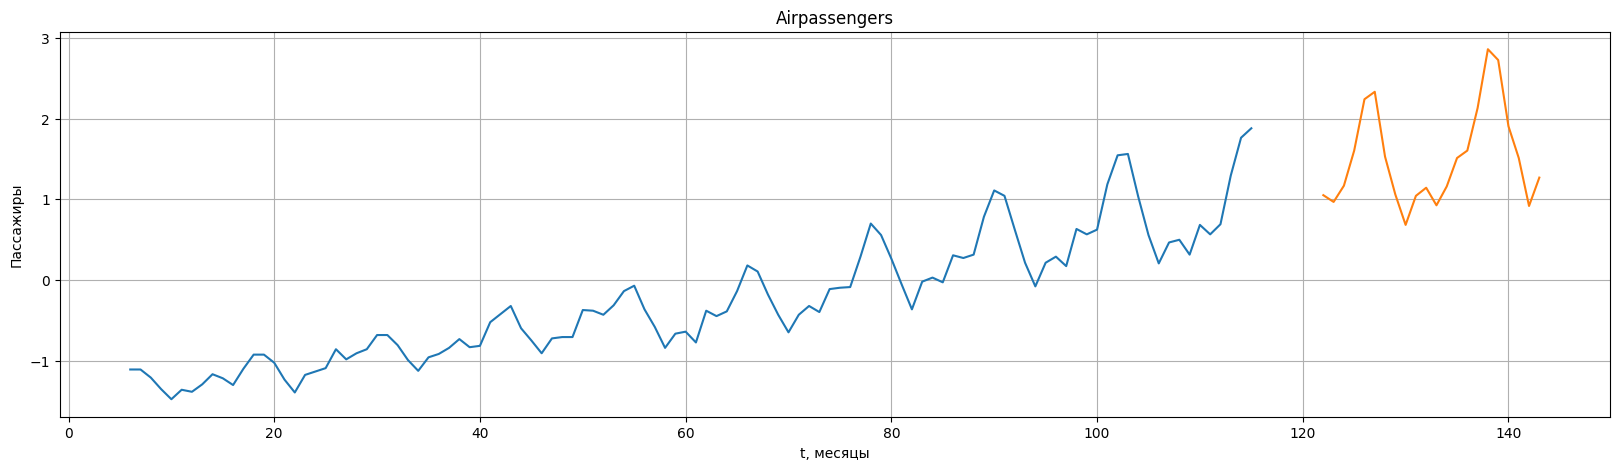

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(df.index[xLen:yTrain.shape[0] + xLen], yTrain[:])
# plt.plot(df.index[yTrain.shape[0] + bias + future + 2*xLen -1:], yVal[:])
plt.plot(df.index[yTrain.shape[0] + future + 2*xLen -1:], yVal[:])
plt.grid()
plt.xlabel('t, месяцы')
plt.ylabel('Пассажиры')
plt.title('Airpassengers')

In [ ]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    xTrain,
    yTrain,
    sequence_length = xLen,
    sampling_rate = 1,
    batch_size = batch_size,
)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    xVal,
    yVal,
    sequence_length = xLen,
    sampling_rate = 1,
    batch_size = batch_size,
)

In [ ]:
# Проверим, что все верно (для X[i, xLen, :] y[i] - необходимо контролировать, что X[i, xLen, 0] не входи y[i]
for batch in dataset_val.take(2):
	inputs, targets = batch
print('Input shape:', inputs.numpy().shape)
print('Target shape:', targets.numpy().shape)

Input shape: (17, 6, 3)
Target shape: (17,)


In [ ]:
callback = EarlyStopping(monitor='val_mae', patience=0)
model = Sequential()
model.add(LSTM(64, input_shape = (inputs.shape[1], inputs.shape[2]), return_sequences='True'))
model.add(LSTM(64, return_sequences = 'True'))
model.add(Conv1D(64, 3, activation = 'linear'))
model.add(Flatten())
model.add(Dense(3, activation = 'linear'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

history = model.fit(dataset_train, epochs = epochs, validation_data = dataset_val, callbacks = [callback])

Epoch 1/10
4/4 [==============================] - 7s 301ms/step - loss: 0.6160 - mae: 0.6670 - val_loss: 2.4337 - val_mae: 1.4488
Epoch 2/10
4/4 [==============================] - 0s 29ms/step - loss: 0.4946 - mae: 0.5923 - val_loss: 2.0632 - val_mae: 1.3104
Epoch 3/10
4/4 [==============================] - 0s 25ms/step - loss: 0.3864 - mae: 0.5169 - val_loss: 1.5523 - val_mae: 1.0867
Epoch 4/10
4/4 [==============================] - 0s 25ms/step - loss: 0.2601 - mae: 0.4237 - val_loss: 0.9649 - val_mae: 0.7861
Epoch 5/10
4/4 [==============================] - 0s 25ms/step - loss: 0.1643 - mae: 0.3406 - val_loss: 0.6074 - val_mae: 0.6682
Epoch 6/10
4/4 [==============================] - 0s 25ms/step - loss: 0.1597 - mae: 0.3340 - val_loss: 0.5620 - val_mae: 0.6399
Epoch 7/10
4/4 [==============================] - 0s 25ms/step - loss: 0.1342 - mae: 0.3081 - val_loss: 0.6762 - val_mae: 0.6678


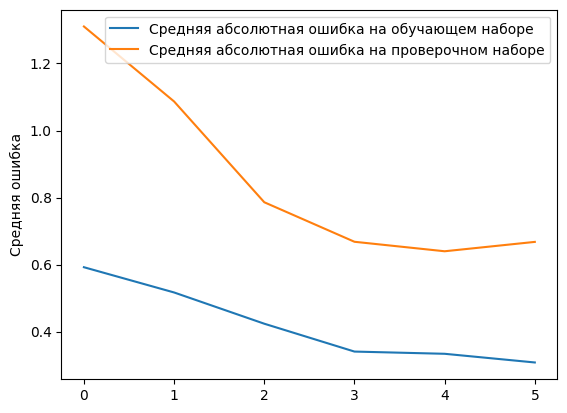

In [ ]:
plt.plot(history.history['mae'][1:], label = 'Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'][1:], label = 'Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
callback = EarlyStopping(monitor = 'val_mae', patience = 5)

model = Sequential()
model.add(LSTM(64, input_shape = (inputs.shape[1], inputs.shape[2]), return_sequences = 'True'))
model.add(Flatten())
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.000175), metrics = ['mae'])

history = model.fit(dataset_train, epochs=250, validation_data=dataset_val, callbacks=[callback])

Epoch 1/250
4/4 [==============================] - 3s 160ms/step - loss: 0.5375 - mae: 0.6264 - val_loss: 2.3097 - val_mae: 1.4134
Epoch 2/250
4/4 [==============================] - 0s 23ms/step - loss: 0.5003 - mae: 0.6029 - val_loss: 2.2253 - val_mae: 1.3828
Epoch 3/250
4/4 [==============================] - 0s 23ms/step - loss: 0.4706 - mae: 0.5830 - val_loss: 2.1387 - val_mae: 1.3505
Epoch 4/250
4/4 [==============================] - 0s 24ms/step - loss: 0.4430 - mae: 0.5638 - val_loss: 2.0525 - val_mae: 1.3175
Epoch 5/250
4/4 [==============================] - 0s 23ms/step - loss: 0.4169 - mae: 0.5454 - val_loss: 1.9677 - val_mae: 1.2841
Epoch 6/250
4/4 [==============================] - 0s 24ms/step - loss: 0.3921 - mae: 0.5274 - val_loss: 1.8848 - val_mae: 1.2506
Epoch 7/250
4/4 [==============================] - 0s 23ms/step - loss: 0.3684 - mae: 0.5100 - val_loss: 1.8040 - val_mae: 1.2168
Epoch 8/250
4/4 [==============================] - 0s 24ms/step - loss: 0.3458 - mae: 0.4

In [ ]:
history = model.fit(dataset_train, epochs=50, batch_size=1, validation_data=dataset_val, callbacks=[callback])

Epoch 1/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0187 - mae: 0.1101 - val_loss: 0.0485 - val_mae: 0.1661
Epoch 2/50
4/4 [==============================] - 0s 27ms/step - loss: 0.0185 - mae: 0.1096 - val_loss: 0.0478 - val_mae: 0.1656
Epoch 3/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0183 - mae: 0.1091 - val_loss: 0.0472 - val_mae: 0.1650
Epoch 4/50
4/4 [==============================] - 0s 24ms/step - loss: 0.0182 - mae: 0.1086 - val_loss: 0.0466 - val_mae: 0.1645
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0180 - mae: 0.1081 - val_loss: 0.0460 - val_mae: 0.1643
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 0.0178 - mae: 0.1076 - val_loss: 0.0454 - val_mae: 0.1645
Epoch 7/50
4/4 [==============================] - 0s 25ms/step - loss: 0.0177 - mae: 0.1071 - val_loss: 0.0449 - val_mae: 0.1648
Epoch 8/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0175 - mae: 0.1067 - val

In [ ]:
pred = model.predict(dataset_train).flatten()
predVal = model.predict(dataset_val).flatten()

1/1 [==============================] - 0s 42ms/step


In [ ]:
predVal

array([0.9315111 , 1.1649737 , 1.4062018 , 1.8175497 , 2.2771568 ,
       2.0163565 , 1.6743522 , 1.0479345 , 0.6560159 , 0.58742946,
       0.7476086 , 0.98952466, 1.1519053 , 1.3861454 , 1.749887  ,
       2.223857  , 2.6411328 ], dtype=float32)

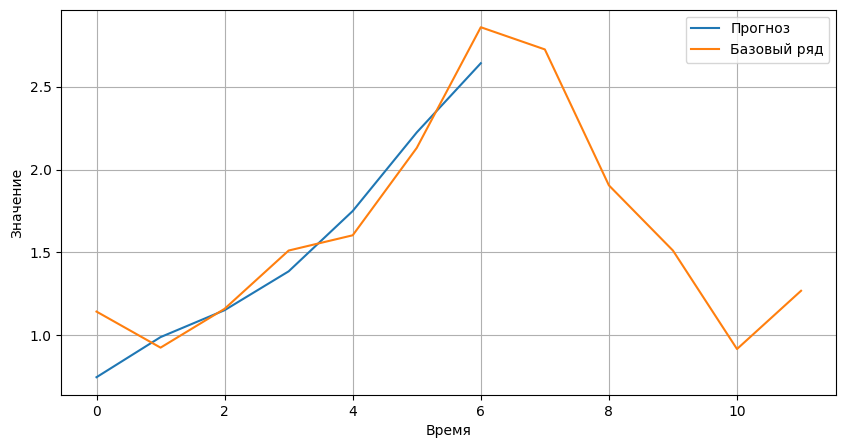

In [ ]:
start = 10
step = 100
plt.figure(figsize=(10,5))
plt.grid('on')
plt.plot(predVal[start:start+step], label='Прогноз')
plt.plot(yVal.flatten()[start:start+step], label = 'Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

Проверим лаговые корреляции:

In [ ]:
def correlate(a, b):
	ma = a.mean()
	mb = b.mean()
	mab = (a*b).mean()
	sa = a.std()
	sb = b.std()
	val = 0
	if ((sa > 0) & (sb > 0)):
		val = (mab - ma*mb)/(sa*sb)
	return val

In [ ]:
len(predVal[:]), len(yVal[5:])

(17, 17)

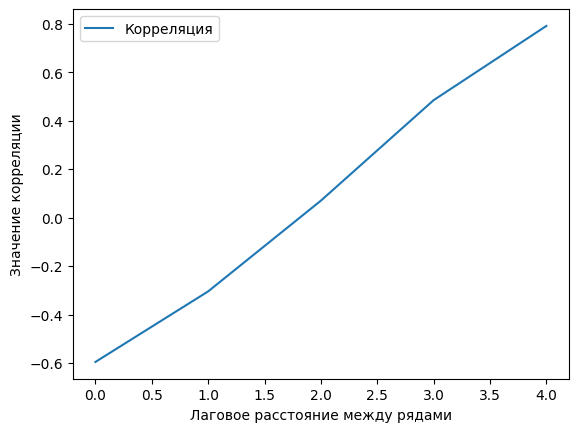

In [ ]:
corr = []
start = 5 # Начальная точка для проверки корреляций рядов
step = 150 # Число точек для проверки корреляций рядов
h = 0
yLen = yVal.shape[0]
yValF = yVal[start:] # Ряд истинных значений
yPredVal = predVal[:] # Ряд предсказаний
# Смотрим лаговые корреляции yValF[:-i], yPredVal[i:] для лагов от 0 до 5
for i in range(5):
	corr.append(correlate(yValF[:-1-i], yPredVal[i:-1]))

plt.plot(corr, label = 'Корреляция')
plt.xlabel('Лаговое расстояние между рядами')
plt.ylabel('Значение корреляции')
plt.legend()
plt.show()

## Урок 5. Рекуррентные нейронные сети
## Практическое задание

<ol>
    <li>Попробуйте изменить параметры нейронной сети, работающей с датасетом imdb, либо нейронной сети, работающей с airline-passengers (она прилагается вместе с датасетом к уроку в виде отдельного скрипта), так, чтобы улучшить ее точность. Приложите анализ.</li>
    <li>Попробуйте изменить параметры нейронной сети, генерирующей текст, таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившийся у вас текст и опишите то, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.</li>
    <li>* Попробуйте на numpy реализовать нейронную сеть архитектуры. LSTM</li>
    <li>* Предложите свои варианты решения проблемы исчезающего градиента в RNN.</li>
</ol>

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 100
batch_size = 256 #128 # увеличьте значение для ускорения обучения
def train_nn():
  print('Построение модели...')
  #model = Sequential()
  #model.add(Embedding(max_features, 128))
  #model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
  #model.add(Dense(32, activation='relu'))
  #model.add(Dense(1, activation='sigmoid'))

  model = Sequential()
  model.add(Embedding(max_features, 128))
  model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(32, activation='LeakyReLU'))
  model.add(Dropout(0.4))
  model.add(Dense(16, activation='elu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))


  print('Загрузка данных...')
 #стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров
  model.compile(loss='binary_crossentropy',
                optimizer='Adam', # при использовании этого оптимайзера модель показывает наилучшие результаты.
                metrics=['accuracy'])
  (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
  print(len(x_train), 'тренировочные последовательности')
  print(len(x_test), 'тестовые последовательности')

  print('Pad последовательности (примеров в x единицу времени)')
  x_train = pad_sequences(x_train, maxlen=maxlen)
  x_test = pad_sequences(x_test, maxlen=maxlen)
  print('x_train shape:', x_train.shape)
  print('x_test shape:', x_test.shape)

  print('Процесс обучения...')
  model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=10, # увеличьте при необходимости
            validation_data=(x_test, y_test))
  score, acc = model.evaluate(x_test, y_test,
                              batch_size=batch_size)
  print('Результат при тестировании:', score)
  print('Тестовая точность:', acc)



train_nn()
  #

Построение модели...
Загрузка данных...
17464789/17464789 [==============================] - 0s 0us/step
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
Процесс обучения...
Epoch 1/10
98/98 [==============================] - 50s 447ms/step - loss: 0.5495 - accuracy: 0.7077 - val_loss: 0.3614 - val_accuracy: 0.8420
Epoch 2/10
98/98 [==============================] - 38s 387ms/step - loss: 0.3172 - accuracy: 0.8763 - val_loss: 0.3446 - val_accuracy: 0.8494
Epoch 3/10
98/98 [==============================] - 38s 384ms/step - loss: 0.2568 - accuracy: 0.9055 - val_loss: 0.3976 - val_accuracy: 0.8472
Epoch 4/10
98/98 [==============================] - 38s 391ms/step - loss: 0.2078 - accuracy: 0.9254 - val_loss: 0.4495 - val_accuracy: 0.8421
Epoch 5/10
98/98 [==============================] - 35s 362ms/step - loss: 0.1719 - accuracy: 0.9410 - val_loss: 0.4966 -

Слои дропаут повышают качество модели.

In [ ]:
batch_size = 128
maxlen = 128
from keras.layers import Dropout, ConvLSTM1D

In [ ]:
batch_size = 256
epochs = 20

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='LeakyReLU'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Use a different optimizer
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
# Train the model
model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test))


Epoch 1/20
98/98 [==============================] - 55s 525ms/step - loss: 0.6704 - accuracy: 0.5820 - val_loss: 0.5183 - val_accuracy: 0.7724
Epoch 2/20
98/98 [==============================] - 61s 620ms/step - loss: 0.4836 - accuracy: 0.7900 - val_loss: 0.4161 - val_accuracy: 0.8162
Epoch 3/20
98/98 [==============================] - 47s 484ms/step - loss: 0.3816 - accuracy: 0.8448 - val_loss: 0.4388 - val_accuracy: 0.8050
Epoch 4/20
98/98 [==============================] - 48s 486ms/step - loss: 0.3426 - accuracy: 0.8648 - val_loss: 0.5219 - val_accuracy: 0.7874
Epoch 5/20
98/98 [==============================] - 45s 464ms/step - loss: 0.3092 - accuracy: 0.8816 - val_loss: 0.3475 - val_accuracy: 0.8620
Epoch 6/20
98/98 [==============================] - 45s 456ms/step - loss: 0.2851 - accuracy: 0.8914 - val_loss: 0.4093 - val_accuracy: 0.8506
Epoch 7/20
98/98 [==============================] - 46s 470ms/step - loss: 0.2609 - accuracy: 0.9024 - val_loss: 0.3394 - val_accuracy: 0.8641

In [ ]:
from keras.backend import dropout
def train_nn_1():
  print('Загрузка данных...')
  (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
  print(len(x_train), 'тренировочные последовательности')
  print(len(x_test), 'тестовые последовательности')

  print('Pad последовательности (примеров в x единицу времени)')
  x_train = pad_sequences(x_train, maxlen=maxlen)
  x_test = pad_sequences(x_test, maxlen=maxlen)
  print('x_train shape:', x_train.shape)
  print('x_test shape:', x_test.shape)

  print('Построение модели...')
  model = Sequential()
  model.add(Embedding(max_features, 128))
  model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(32, activation='LeakyReLU'))            # New line
  model.add(Dropout(0.4))
  model.add(Dense(16, activation='elu'))
  model.add(Dropout(0.2))                                  # New line
  model.add(Dense(1, activation='sigmoid'))

  # стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров
  model.compile(loss='binary_crossentropy',
                optimizer='RMSprop', # при использовании этого оптимайзера модель показывает наилучшие результаты.
                metrics=['accuracy'])

  print('Процесс обучения...')
  model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=10, # увеличьте при необходимости
            validation_data=(x_test, y_test))
  score, acc = model.evaluate(x_test, y_test,
                              batch_size=batch_size)
  print('Результат при тестировании:', score)
  print('Тестовая точность:', acc)
train_nn_1()

Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)


x_train shape: (25000, 128)
x_test shape: (25000, 128)
Построение модели...
Процесс обучения...
Epoch 1/10
98/98 [==============================] - 52s 486ms/step - loss: 0.6624 - accuracy: 0.5889 - val_loss: 0.5454 - val_accuracy: 0.7483
Epoch 2/10
98/98 [==============================] - 47s 482ms/step - loss: 0.4740 - accuracy: 0.7919 - val_loss: 0.3704 - val_accuracy: 0.8344
Epoch 3/10
98/98 [==============================] - 46s 465ms/step - loss: 0.3824 - accuracy: 0.8444 - val_loss: 0.3379 - val_accuracy: 0.8564
Epoch 4/10
98/98 [==============================] - 45s 458ms/step - loss: 0.3378 - accuracy: 0.8672 - val_loss: 0.4372 - val_accuracy: 0.8133
Epoch 5/10
98/98 [==============================] - 44s 453ms/step - loss: 0.3097 - accuracy: 0.8803 - val_loss: 0.4140 - val_accuracy: 0.8307
Epoch 6/10
98/98 [==============================] - 43s 443ms/step - loss: 0.2808 - accuracy: 0.8915 - val_loss: 0.3312 - val_accuracy: 0.8652
Epoch 7/10
98/98 [============================

In [ ]:
from keras.datasets import imdb

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
X_train = x_train.reshape((x_train.shape[0], 1, 128, 1))
X_test = x_test.reshape((x_test.shape[0], 1, 128, 1))


In [ ]:
def train_nn_2(X_train, y_train,X_test, y_test):
  # print('Загрузка данных...')
  # (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
  # print(len(x_train), 'тренировочные последовательности')
  # print(len(x_test), 'тестовые последовательности')

  # print('Pad последовательности (примеров в x единицу времени)')
  # x_train = pad_sequences(x_train, maxlen=maxlen)
  # x_test = pad_sequences(x_test, maxlen=maxlen)
  # print('x_train shape:', x_train.shape)
  # print('x_test shape:', x_test.shape)

  print('Построение модели...')
  model = Sequential()
  #model.add(Embedding(max_features, 128))
  model.add(ConvLSTM1D(128,kernel_size=32, dropout=0.4, recurrent_dropout=0.4))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(32, activation='LeakyReLU'))            # New line
  model.add(Dropout(0.4))
  model.add(Dense(16, activation='elu'))
  model.add(Dropout(0.2))                                  # New line
  model.add(Dense(1, activation='sigmoid'))

  # стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров
  model.compile(loss='binary_crossentropy',
                optimizer='Adam', # при использовании этого оптимайзера модель показывает наилучшие результаты.
                metrics=['accuracy'])

  print('Процесс обучения...')
  model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=10, # увеличьте при необходимости
            validation_data=(x_test, y_test))
  score, acc = model.evaluate(x_test, y_test,
                              batch_size=batch_size)
  print('Результат при тестировании:', score)
  print('Тестовая точность:', acc)


In [ ]:
train_nn_2(X_train, y_train,X_test, y_test)

Построение модели...
Процесс обучения...
Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_7' (type Sequential).
    
    Input 0 of layer "conv_lstm1d" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 128)
    
    Call arguments received by layer 'sequential_7' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 128), dtype=int32)
      • training=True
      • mask=None
